## K Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sys
%matplotlib inline

We will not use our y since K Means is an unsupervised Machine Learning Algorithm and thus there are not predefined output labels for the data.

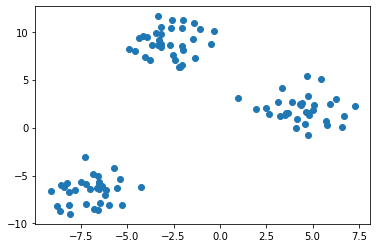

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.4, random_state=42)
plt.scatter(x=X[:, 0], y=X[:, 1])
y = y.reshape((-1, 1))

#### As shown above, our dataset does not have predefined labels so we will not use y for our reference. Thus, a clustering problem generally does not have a single correct answer.

There can be 2, 3 or more clusters hidden in the data and we really can't eyeball it. This is where we use Clustering Algorithms like K Means Clustering to find the perfect number of clusters our data can be divided into, based on 'some similarities' that may or may not be known to us.

<div>
    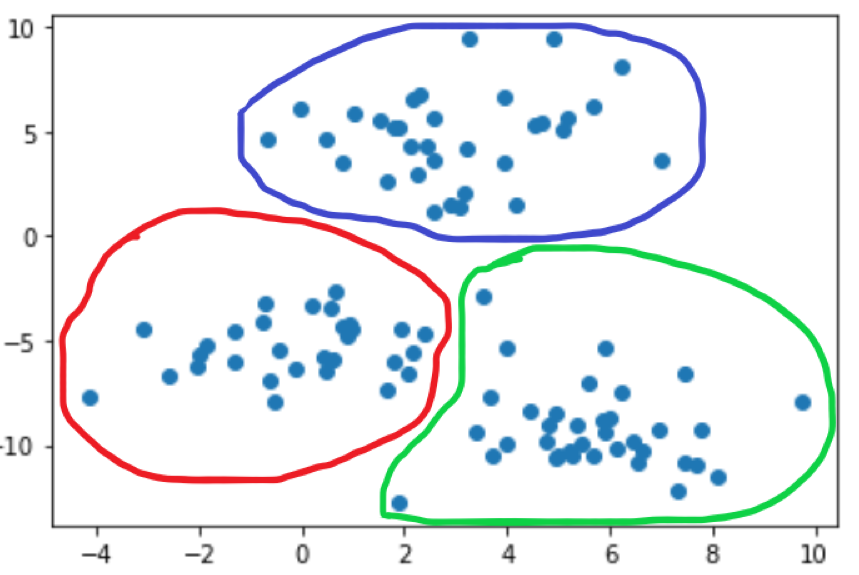
    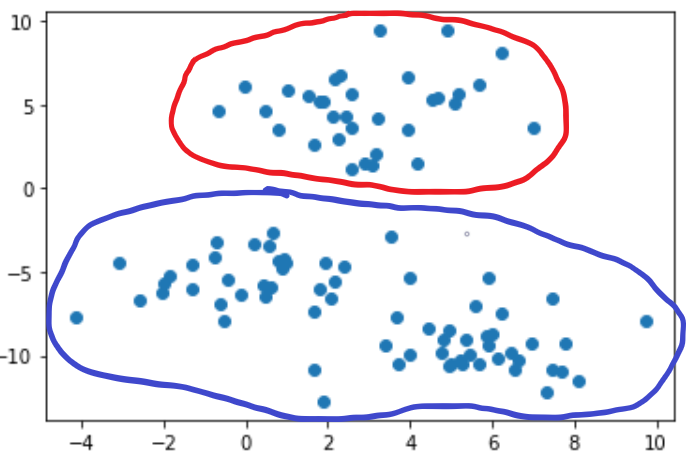
</div>

In [3]:
class KMeansClustering:
    def __init__(self, K=2, max_iters=50, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        
    def __random_initialization(self):
        # We want to randomly initialize our cluster centroids
        # We will choose random k training samples as our cluster centroids
        m, n = self.X.shape
        random_cc_index = np.random.choice(m, self.K, replace=False)
        self.cc = self.X[random_cc_index, :].copy()
        # print(self.cc)
        self.c = [[] for _ in range(self.K)]
        # print(self.c)
        
    def cluster_assignment(self):
        # We are given a data point and we have to assign it, its nearest cluster centroid in self.c
        c = [[] for _ in range(self.K)]
        for idx, data_point in enumerate(self.X):
            distances = []
            for cc_i in self.cc:
                # Checking the distances
                # print(np.linalg.norm(data_point - cc_i))
                distances.append(np.linalg.norm(data_point - cc_i))
            nearest_cc_index = distances.index(min(distances))
            # print(nearest_cc_index)
            # We will append the index of the data sample in the list of its corresponding cc.
            c[nearest_cc_index].append(idx)
        self.c = c
        # print(self.c)
    
    def centroid_shift(self):
        for i in range(self.K):
            new_pos = np.mean(self.X[self.c[i], :], axis=0)
            self.cc[i] = new_pos
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(7, 5))
        for i in self.c:
            ax.scatter(self.X[i, 0], self.X[i, 1])
            
        ax.scatter(self.cc[:, 0], self.cc[:, 1], marker='X', color="black", linewidth=3)
                   
        plt.show()
        
    def __is_converged(self, initial_cc, new_cc):
        distances = [np.linalg.norm(new_cc[i] - initial_cc[i]) for i in range(self.K)]
        return sum(distances) == 0
        
        
    def fit(self, X, converge_print=True):
        self.X = X
        # Randomly initialize cluster centroids
        self.__random_initialization()
        for _ in range(self.max_iters):
            # Cluster Centroids before shifting 
            old_cc = self.cc.copy()
            # Assign each sample its cluster depending on the current cc's
            self.cluster_assignment()
            # Plot if necessary
            if self.plot_steps:
                print(f"Epoch {_} : Cluster Assigment")
                self.plot()
            
            # Shift the centroids to the mean position of their current clusters
            self.centroid_shift()
            if self.plot_steps:
                print(f"Epoch {_} : Cluster Centroid Shift")
                self.plot()
            
            # Check if our cluster centroids aren't shifting anymore, and if yes, our algo has converged
            if self.__is_converged(old_cc, self.cc) == True:
                if converge_print:
                    print("Algorithm has converged")
                break
                
    
    def cost_function(self, X):
        cost = 0
        for idx, cc_i in enumerate(self.cc):
            cost += np.linalg.norm(cc_i - X[self.c[idx], :])
            
        return cost

In [4]:
def find_best_k(X, epochs = 10):
    
    for _ in range(epochs):
        costs = []
        K_s = np.arange(1, 6)
        for k in K_s:
            model = KMeansClustering(K=k, max_iters=20)
            model.fit(X, converge_print=False)
            costs.append(model.cost_function(X))

        plt.plot(K_s, costs)
        plt.show()    

### Let's see how 3 clusters are assigned and optimized

Epoch 0 : Cluster Assigment


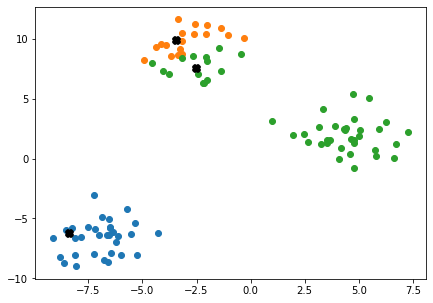

Epoch 0 : Cluster Centroid Shift


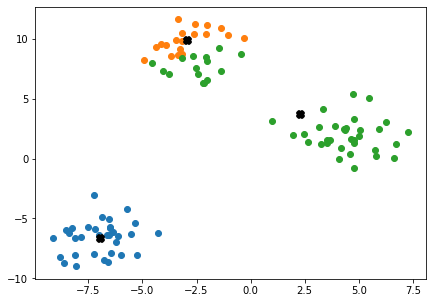

Epoch 1 : Cluster Assigment


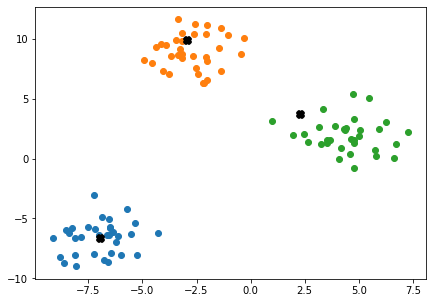

Epoch 1 : Cluster Centroid Shift


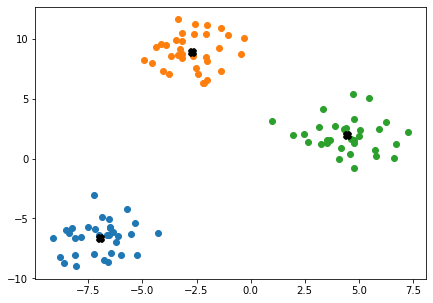

Epoch 2 : Cluster Assigment


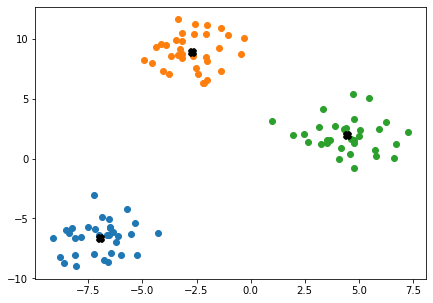

Epoch 2 : Cluster Centroid Shift


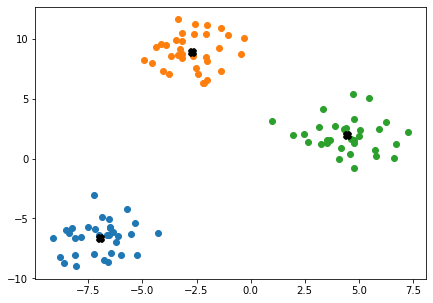

Algorithm has converged


In [11]:
# Confirming the distance between the first data point and the first cluster centroid
# np.linalg.norm(X[0]-[[ 2.22499387, 1.18596714]])

KMC = KMeansClustering(K = 3, max_iters=10, plot_steps=True)
KMC.fit(X)

### Visualize the performance of different values of k

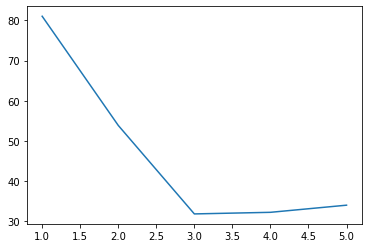

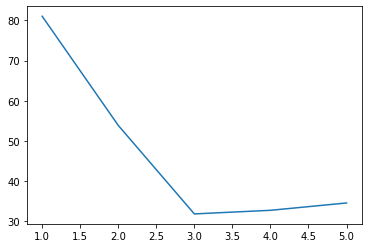

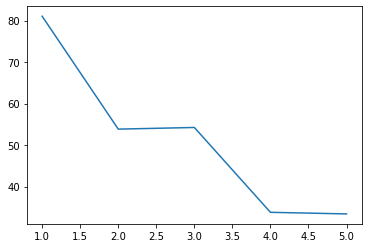

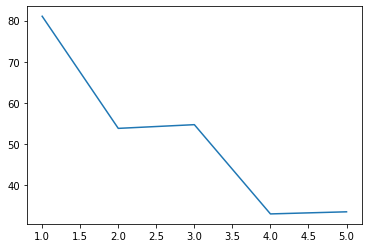

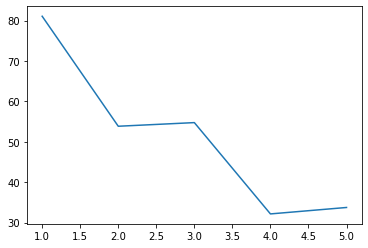

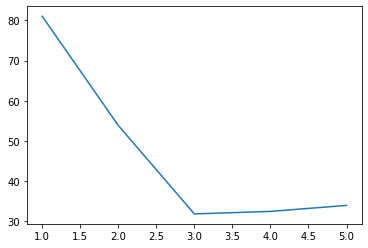

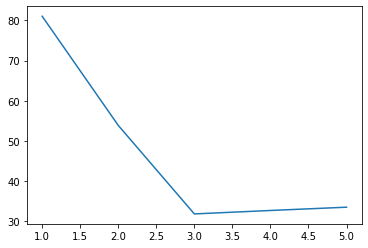

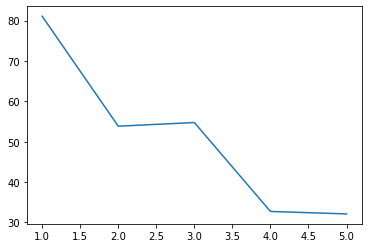

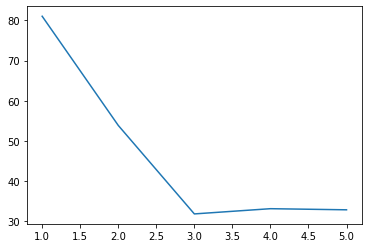

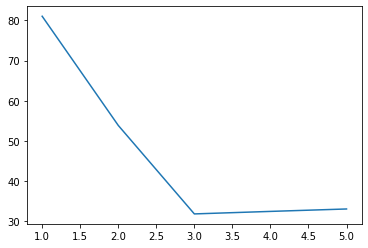

In [13]:
find_best_k(X)

Clearly, k = 3 has performed the best and we can see the 'Elbow joint' at k = 3 for most of the epochs

### The dataset used above was pretty easy to cluster.

#### Let's use a more noisy dataset and see how our algorithm performs for different values of K

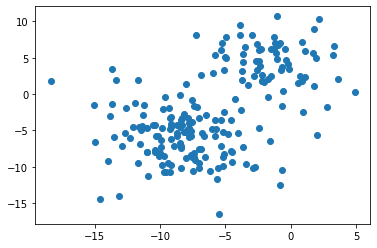

In [7]:
X_new, y_new = make_blobs(n_samples=200, n_features=2, cluster_std=3, random_state=1)
plt.scatter(x=X_new[:, 0], y=X_new[:, 1])
y_new = y_new.reshape((-1, 1))

Algorithm has converged


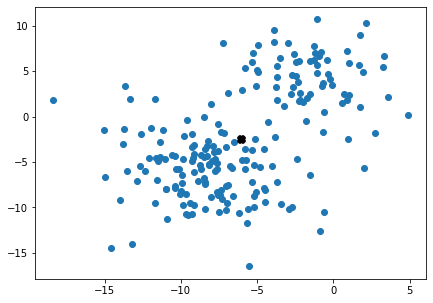

Algorithm has converged


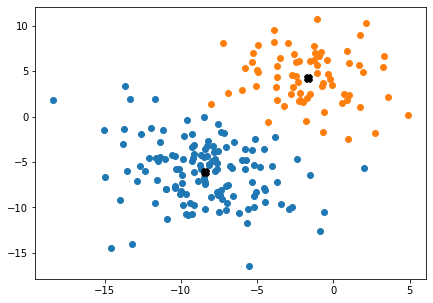

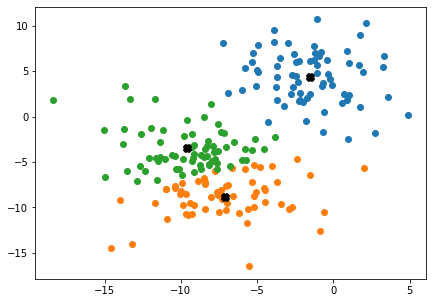

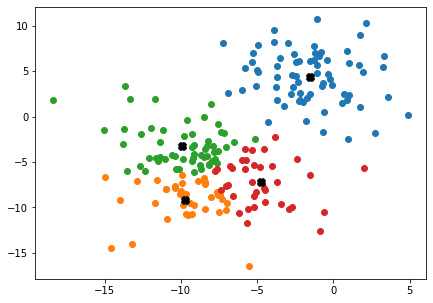

Algorithm has converged


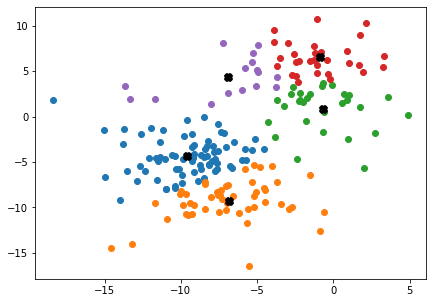

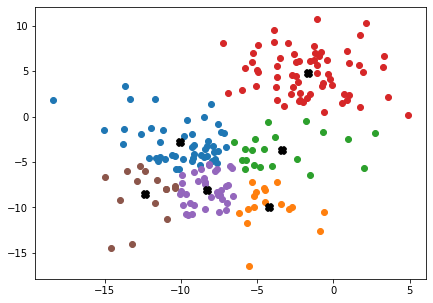

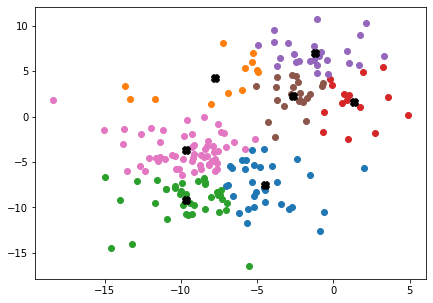

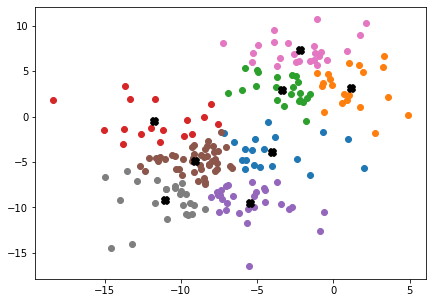

Algorithm has converged


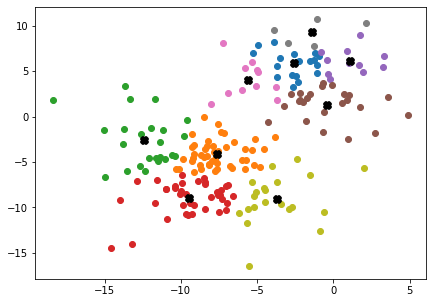

In [8]:
for k in np.arange(1, 10):
    KMC_new = KMeansClustering(K = k, max_iters=10, plot_steps=False)
    KMC_new.fit(X_new)
    KMC_new.plot()

### Again visualizing the performance of different values of k

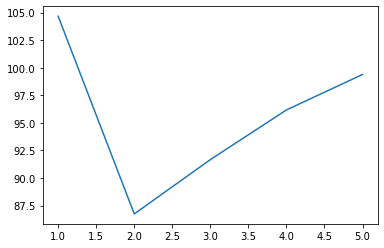

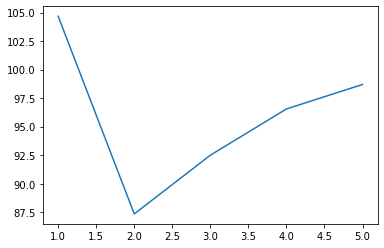

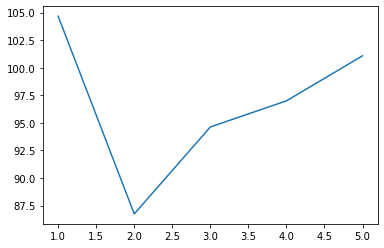

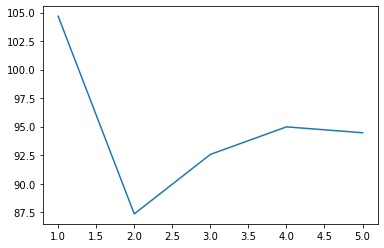

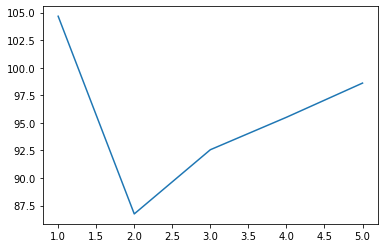

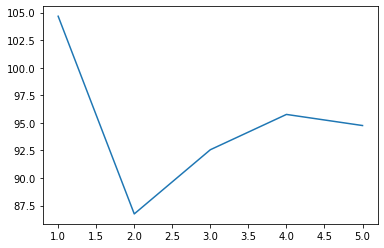

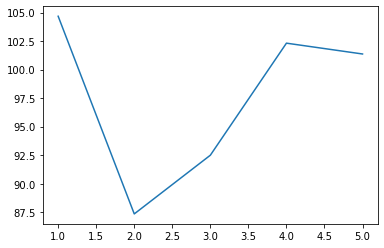

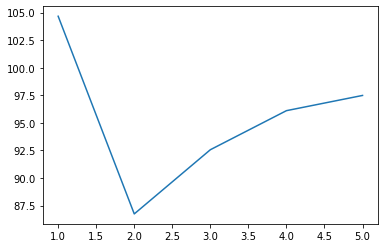

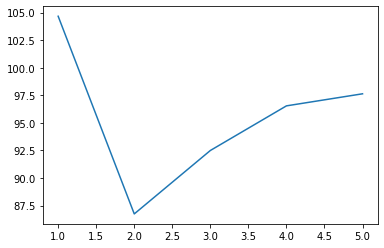

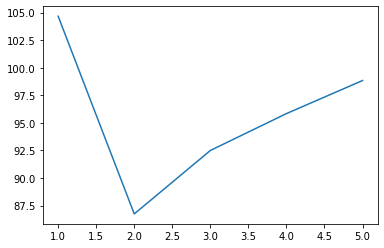

In [9]:
find_best_k(X_new)

Clearly, k = 2 has the best performance for the data and we can see the 'Elbow Joint' for k = 2 in most of the epochs

### Important

* It is easy for K Means to get stuck in a **local optima** and thus one *must ensure multiple epochs involving random initializations of the cluster centroids* so that the odds of coverging to an optimum minima increase.

* The chances of getting stuck in a local optima increase if the number of cluster centroids (K) is less. **The higher the value of K, the less chances of getting stuck in local optima** and thus you can expect the algorithm to converge within a couple of epochs of random initializations.

* It is essential to find the best value of K by using the **Elbow Joint** method unless you already have a desired value of K. For example, if you want to make clusters for 4 different sizes of clothes then K = 4. This is particularly useful when data is multi-dimensional and it is not possible to visualize the clusters on a 2-D or 3-D graph.